# Testing the model that we trained in `lab5.ipynb` notebook

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import keras
import numpy as np

num_filters = 8
filter_size = 3
pool_size = 2

model = keras.Sequential(
    [
        layers.Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
        layers.Conv2D(num_filters, filter_size),
        layers.MaxPooling2D(pool_size=pool_size),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation = "softmax"),
    ]
)


# Load the model's saved weights.
model.load_weights('cnn.h5')

## Load test data

In [ ]:
import mnist

test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


## Prediction

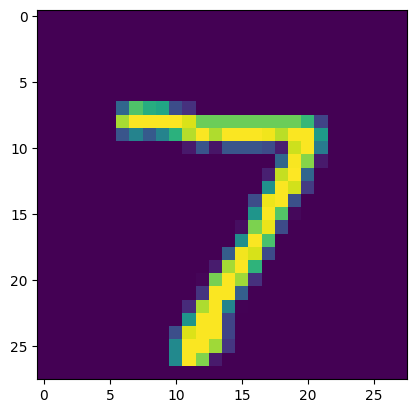

In [ ]:
plt.imshow(test_images[0]);

In [ ]:
# Predict on the first 15 test images.
predictions = model.predict(test_images[:15])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labels[:15])

1/1 [==============================] - 0s 32ms/step
[7 2 8 0 4 8 8 9 5 9 0 6 9 0 8]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


## Evaluation metrics
To evaluate the predictions use the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

In [ ]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

number_of_samples = 50
predictions = np.argmax(model.predict(test_images[:number_of_samples]), axis=1)
print(classification_report(test_labels[:number_of_samples], predictions))

2/2 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         9
           2       1.00      1.00      1.00         5
           3       0.75      0.75      0.75         4
           4       1.00      0.89      0.94         9
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         5

    accuracy                           0.76        50
   macro avg       0.78      0.75      0.76        50
weighted avg       0.80      0.76      0.78        50

